In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
iris_data = pd.read_csv("../aiml/iris.csv")
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
print("Sepal length range: [%s, %s]" % (min(iris_data["sepal_length"]),max(iris_data["sepal_length"])))
print("Sepal width range: [%s, %s]" % (min(iris_data["sepal_width"]),max(iris_data["sepal_width"])))
print("Petal length range: [%s, %s]" % (min(iris_data["petal_length"]),max(iris_data["petal_length"])))
print("Petal width range: [%s, %s]" % (min(iris_data["petal_width"]),max(iris_data["petal_width"])))

print("Sepal Length standard deviation :\t %f" %np.std(iris_data["sepal_length"]))
print("Sepal Width standard deviation :\t %f" %np.std(iris_data["sepal_width"]))
print("Petal Length standard deviation :\t %f" %np.std(iris_data["petal_length"]))
print("Petal Width standard deviation :\t %f" %np.std(iris_data["petal_width"]))

Sepal length range: [4.3, 7.9]
Sepal width range: [2.0, 4.4]
Petal length range: [1.0, 6.9]
Petal width range: [0.1, 2.5]
Sepal Length standard deviation :	 0.825301
Sepal Width standard deviation :	 0.434411
Petal Length standard deviation :	 1.759404
Petal Width standard deviation :	 0.759693


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

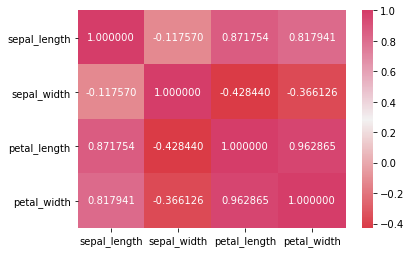

In [10]:
corr = iris_data.corr(method ="pearson")
display(corr)
sns.heatmap(corr,cmap =sns.diverging_palette(10,0,as_cmap=True),annot= True,fmt = "f")

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
x_new1 =pca.fit_transform(iris_data.drop(["species"],axis =1))
x_new1[:5]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02]])

In [12]:
# Variance
explained_variance= pca.explained_variance_ratio_

explained_variance

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

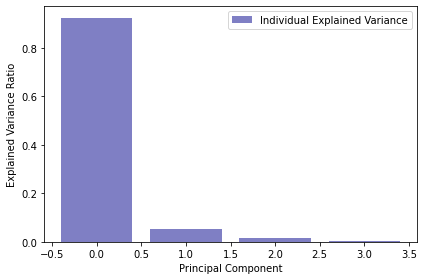

In [13]:
plt.figure(figsize =(6,4))
plt.bar(range(4),explained_variance, alpha=0.5, align='center', label ="Individual Explained Variance", color ="darkblue")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.legend(loc ="best")
plt.tight_layout()

In [14]:
# Applying PCA
pca  = PCA(n_components=3)
x_new =pca.fit_transform(iris_data.drop(['species'],axis =1))
x_new[:5]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924]])

In [16]:
# Correlation And Direction of PCA
categ_num ={"species":{"setosa":0,"versicolor":1,"virginica":2}}
iris_data1 = iris_data.replace(categ_num)
columns = list(iris_data.columns[:4])

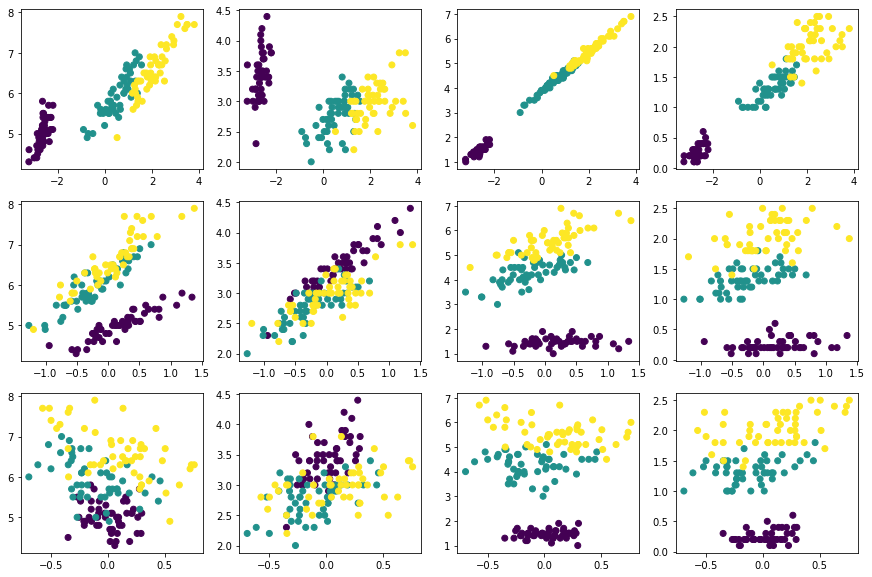

In [17]:
# Comparing Principal Components with original variables
fig, axes =plt.subplots(3,4,figsize =(15,10))
k= 0
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        axes[i,j].scatter(x_new[:,i],iris_data[columns[j]],c =iris_data1["species"])
plt.show()